# Multi-Layer Perceptron (MLP): Solving XOR

We saw that a single neuron (**The Perceptron**) failed to solve XOR because XOR is not "linearly separable".

### The Solution: Add a Hidden Layer
By adding a layer of neurons *between* the input and output, we allow the network to warp the decision boundary.

This is the birth of **Deep Learning**:
$$ Input \rightarrow Hidden \ Layer \rightarrow Output $$

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier

# The XOR Data (Again)
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

## 1. Creating the MLP
We will use `MLPClassifier`.
- `hidden_layer_sizes=(10,)`: One hidden layer with 10 neurons (More capacity).
- `activation='tanh'`: Hyperbolic Tangent. Often converges smoother than ReLU for simple logic gates.
- `max_iter=5000`: Deep learning needs time to learn.

In [23]:
# Initialize MLP
# Using 'tanh' and more neurons to ensure convergence on this tricky little problem
mlp = MLPClassifier(hidden_layer_sizes=(4,), 
                    activation='tanh', 
                    solver='lbfgs',      
                    random_state=42,     
                    max_iter=500)

mlp.fit(X_xor, y_xor)

print("Training Complete")
print("Predictions:", mlp.predict(X_xor))

Training Complete
Predictions: [0 1 1 0]


## 2. Visualizing the Solution
Did it learn the non-linear boundary?

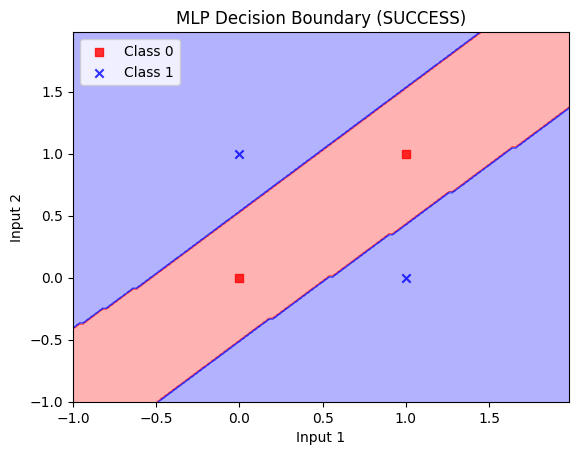

In [24]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend(loc='upper left')

plot_decision_regions(X_xor, y_xor, classifier=mlp)
plt.title('MLP Decision Boundary (SUCCESS)')
plt.show()

### Conclusion
Success! The MLP was able to draw a "curved" or "complex" shape to separate the classes.

It did this by learning a **Hidden Representation** of the data. The hidden neurons worked together to combine the inputs in a way that made them separable.